In [1]:
# WHY DOESN'T THE INSTALL WORK????!!!!! >:O
import sys
sys.path.insert(1, '../tornado_mod')

In [2]:
import os
from importlib import reload
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from classifier.__init__ import *
from streams.generators.__init__ import *

In [5]:
import drift_detection.__init__ as detectors
detector_names = [d for d in dir(detectors) if (not d.startswith('__')) and (d != 'BDDM')]
detectors = [ getattr(detectors, d)() for d in detector_names ]

In [5]:
from run_experiments import create_datastreams, run_trials

# Bernoulli Hard

In [7]:
PX1_list = np.linspace(0, 1, 20)

In [ ]:
streams = [BERNOULLI_HARD, BERNOULLI_TYPICAL]

all_drift_locs = []
for PX1 in PX1_list:
    for mode in ['real', 'virtual']:

        drift_locs = create_datastreams(
            f'./bernoulli_data/{mode}/{PX1:.3f}', 
            streams, 
            n_trials=20, 
            stream_kwargs={
                'concept_length': 1000 if mode=='real' else 2000,
                'mode': mode,
                'PX1': PX1
            }
        )

        all_drift_locs.append(drift_locs)

In [8]:
all_drift_locs

[{'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 

In [8]:
all_drift_locs = [{'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []}]

In [9]:
# Tornado doesn't like empty lists of drift points
all_drift_locs = [ {dataset: [np.inf] if dpoints==[] else dpoints for (dataset, dpoints) in drift_dict.items() } for drift_dict in all_drift_locs ]

Started 11:54am, finished at 9:40pm, so ~10 hours

In [ ]:
%time

pairs = [
    [model, thingy, detector] for detector in detectors
    for (model, thingy) in [
             [NaiveBayes, 'nominal'], 
    ]
]

i = 0
for PX1 in PX1_list:
    for mode in ['real', 'virtual']:
        run_trials(f'bernoulli_data/{mode}/{PX1:.3f}', 
                   f'bernoulli_results/{mode}/{PX1:.3f}', 
                   all_drift_locs[i], 
                   pairs)
        i += 1

# Create LaTeX Tables and CD Diagrams

In [6]:
from parse_results import *
import os

In [13]:
import parse_results
from importlib import reload 
parse_results = reload(parse_results)
process_results = parse_results.process_results

In [22]:
category = 'bernoulli'

In [25]:
results = parse_results.parse_results(f'{category}_results')
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3,d4
1,ADWIN,NAIVE BAYES,0.0,1.0,0.0,0.36,22.87,36.08,250.0,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_18,20200701_142706
2,BWAF,NAIVE BAYES,0.0,1.0,0.0,0.36,10.89,60.99,250.0,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_18,20200701_142706
3,CDDM,NAIVE BAYES,0.0,1.0,0.0,0.36,16.57,20.99,250.0,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_18,20200701_142706
4,CUSUM,NAIVE BAYES,0.0,1.0,0.0,0.36,10.76,14.02,250.0,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_18,20200701_142706
5,DDM,NAIVE BAYES,0.0,1.0,0.0,0.36,10.74,14.49,250.0,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_18,20200701_142706


## Bernoulli Hard

In [26]:
all_results = results.copy()
results = all_results[ all_results['d2']=='BERNOULLI_HARD' ]
category = 'bernoulli_hard'

In [12]:
results = extend_metrics(results)
results.rename(columns={
    'd0': 'Mode', 
    'd1': 'px1', 
    'd2': 'Dataset'
}, inplace=True)
results['dataset_name'] = results['d3'] + results['Model'] + results['Mode'] + results['px1']
results_full = results.copy()
results.drop(columns=['d3', 'Total Delay', 'TP', 'FN', 'FP'], inplace=True)
# a better order
results = results[[
    'Detector', 'Model', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'F1', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

,Detector,Model,Mode,dataset_name,Precision,Recall,F1,Mean Delay,Memory,Runtime
1,ADWIN,NAIVE BAYES,real,BERNOULLI_HARD_18NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,22.87,36.08
2,BWAF,NAIVE BAYES,real,BERNOULLI_HARD_18NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,10.89,60.99
3,CDDM,NAIVE BAYES,real,BERNOULLI_HARD_18NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,16.57,20.99
4,CUSUM,NAIVE BAYES,real,BERNOULLI_HARD_18NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,10.76,14.02
5,DDM,NAIVE BAYES,real,BERNOULLI_HARD_18NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,10.74,14.49


Writing LaTeX table to tables/bernoulli_hard.tex
Processing Precision
Post-hocs computed.
Average vals computed.
Completed plot for Precision
Processing Recall
Post-hocs computed.
Average vals computed.
Completed plot for Recall
Processing F1
Post-hocs computed.
Average vals computed.
Completed plot for F1
Processing Mean Delay
Post-hocs computed.


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Average vals computed.
Completed plot for Mean Delay
Processing Memory
Post-hocs computed.
Average vals computed.
Completed plot for Memory
Processing Runtime
Post-hocs computed.
Average vals computed.
Completed plot for Runtime
Writing cd diagrams to figures/bernoulli_hard.pdf


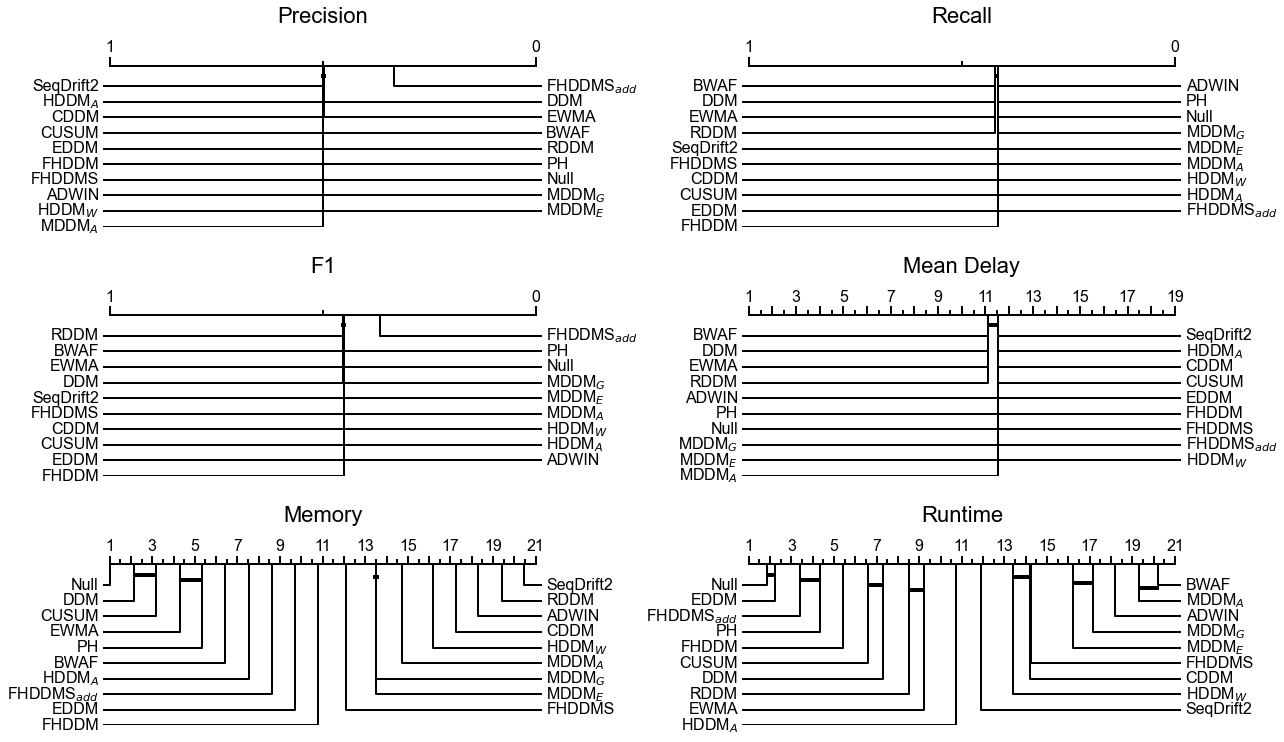

In [14]:
latex = process_results(
    results.drop( columns=['Model', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}.tex',
    fig_path=f'figures/{category}.pdf',
    bold_best=True,
    alpha=0.05
)

In [15]:
results_full['px1'] = results_full.px1.astype(float)
results_full['style']

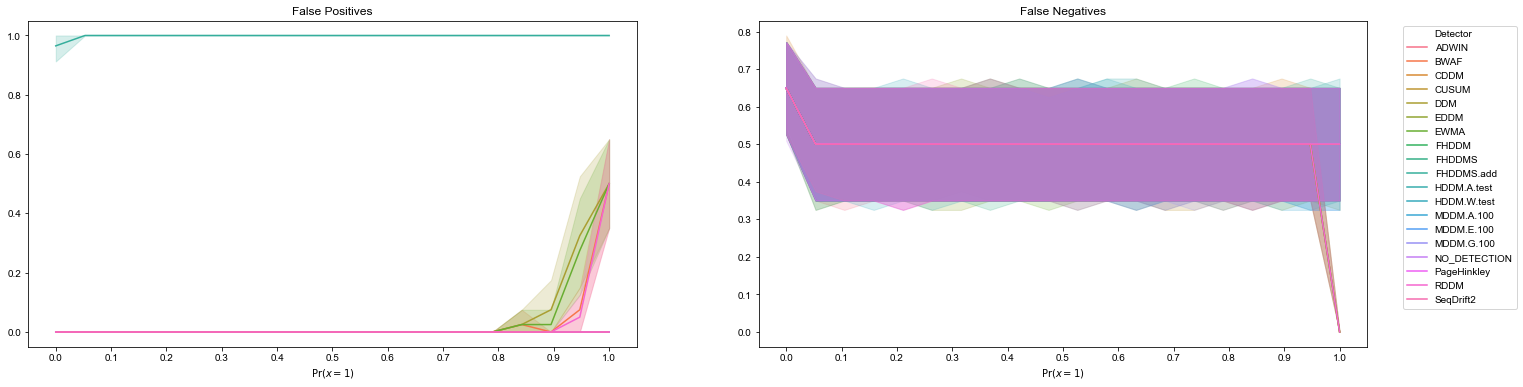

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

l1 = sns.lineplot('px1', 'FP', hue='Detector', data=results_full, ax=ax1, legend=False) # style='Model', 
l1.set(xticks=np.arange(11)/10, title='False Positives', xlabel='$\Pr(x=1)$', ylabel='');
# l1._legend.remove()

l2 = sns.lineplot('px1', 'FN', hue='Detector', data=results_full, ax=ax2)
l2.set(xticks=np.arange(11)/10, title='False Negatives', xlabel='$\Pr(x=1)$', ylabel='');
plt.legend(bbox_to_anchor=(1.05, 1.0));

In [18]:
results_full.groupby('Detector').mean()['FP']

Detector
ADWIN           0.000000
BWAF            0.029376
CDDM            0.000000
CUSUM           0.000000
DDM             0.045288
EDDM            0.000000
EWMA            0.040392
FHDDM           0.000000
FHDDMS          0.000000
FHDDMS.add      0.997552
HDDM.A.test     0.000000
HDDM.W.test     0.000000
MDDM.A.100      0.000000
MDDM.E.100      0.000000
MDDM.G.100      0.000000
NO_DETECTION    0.000000
PageHinkley     0.000000
RDDM            0.026928
SeqDrift2       0.000000
Name: FP, dtype: float64

In [19]:
results_full.groupby('Detector').mean()['FN']

Detector
ADWIN           0.510404
BWAF            0.485924
CDDM            0.510404
CUSUM           0.510404
DDM             0.485924
EDDM            0.510404
EWMA            0.485924
FHDDM           0.510404
FHDDMS          0.510404
FHDDMS.add      0.510404
HDDM.A.test     0.510404
HDDM.W.test     0.510404
MDDM.A.100      0.510404
MDDM.E.100      0.510404
MDDM.G.100      0.510404
NO_DETECTION    0.510404
PageHinkley     0.510404
RDDM            0.485924
SeqDrift2       0.510404
Name: FN, dtype: float64

## Bernoulli Typical

In [27]:
results = all_results[ all_results['d2']=='BERNOULLI_TYPICAL' ]
category = 'bernoulli_typical'

In [28]:
results = extend_metrics(results)
results.rename(columns={
    'd0': 'Mode', 
    'd1': 'px1', 
    'd2': 'Dataset'
}, inplace=True)
results['dataset_name'] = results['d3'] + results['Model'] + results['Mode'] + results['px1']
results_full = results.copy()
results.drop(columns=['d3', 'Total Delay', 'TP', 'FN', 'FP'], inplace=True)
# a better order
results = results[[
    'Detector', 'Model', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'F1', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

/Users/hamishh/Documents/triage_concept_drift/experiments/parse_results.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Precision'] = prec
/Users/hamishh/Documents/triage_concept_drift/experiments/parse_results.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Recall'] = rec
/Users/hamishh/Documents/triage_concept_drift/experiments/parse_results.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Detector,Model,Mode,dataset_name,Precision,Recall,F1,Mean Delay,Memory,Runtime
1,ADWIN,NAIVE BAYES,real,BERNOULLI_TYPICAL_9NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,22.90,35.64
2,BWAF,NAIVE BAYES,real,BERNOULLI_TYPICAL_9NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,10.90,60.15
3,CDDM,NAIVE BAYES,real,BERNOULLI_TYPICAL_9NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,16.58,20.60
4,CUSUM,NAIVE BAYES,real,BERNOULLI_TYPICAL_9NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,10.77,13.65
5,DDM,NAIVE BAYES,real,BERNOULLI_TYPICAL_9NAIVE BAYESreal0.368,0.5,0.333333,0.4,250.0,10.75,14.04


In [ ]:
latex = process_results(
    results.drop( columns=['Model', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}.tex',
    fig_path=f'figures/{category}.pdf',
    bold_best=True,
    alpha=0.05
)

Writing LaTeX table to tables/bernoulli.tex


In [29]:
results_full['px1'] = results_full.px1.astype(float)

AttributeError: 'AxesSubplot' object has no property 'yrange'

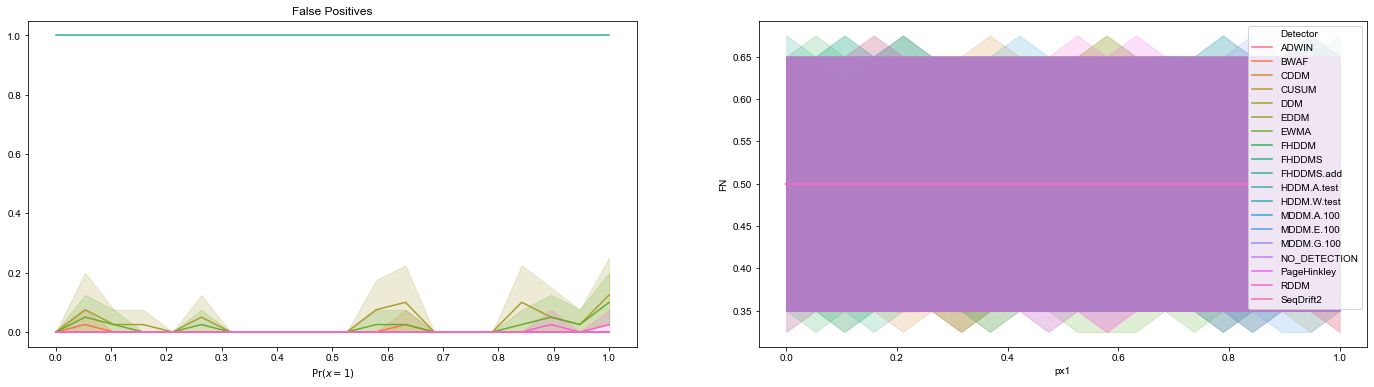

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

l1 = sns.lineplot('px1', 'FP', hue='Detector', data=results_full, ax=ax1, legend=False) # style='Model', 
l1.set(xticks=np.arange(11)/10, title='False Positives', xlabel='$\Pr(x=1)$', ylabel='');
# l1._legend.remove()

l2 = sns.lineplot('px1', 'FN', hue='Detector', data=results_full, ax=ax2)
l2.set(xticks=np.arange(11)/10, title='False Negatives', xlabel='$\Pr(x=1)$', ylabel='', yrange=[0,1]);
plt.legend(bbox_to_anchor=(1.05, 1.0));

In [32]:
results_full.groupby('Detector').mean()['FP']

Detector
ADWIN           0.0000
BWAF            0.0025
CDDM            0.0000
CUSUM           0.0000
DDM             0.0325
EDDM            0.0000
EWMA            0.0175
FHDDM           0.0000
FHDDMS          0.0000
FHDDMS.add      1.0000
HDDM.A.test     0.0000
HDDM.W.test     0.0000
MDDM.A.100      0.0000
MDDM.E.100      0.0000
MDDM.G.100      0.0000
NO_DETECTION    0.0000
PageHinkley     0.0000
RDDM            0.0025
SeqDrift2       0.0000
Name: FP, dtype: float64

In [33]:
results_full.groupby('Detector').mean()['FN']

Detector
ADWIN           0.5
BWAF            0.5
CDDM            0.5
CUSUM           0.5
DDM             0.5
EDDM            0.5
EWMA            0.5
FHDDM           0.5
FHDDMS          0.5
FHDDMS.add      0.5
HDDM.A.test     0.5
HDDM.W.test     0.5
MDDM.A.100      0.5
MDDM.E.100      0.5
MDDM.G.100      0.5
NO_DETECTION    0.5
PageHinkley     0.5
RDDM            0.5
SeqDrift2       0.5
Name: FN, dtype: float64

In [35]:
results_full[['Detector', 'FN']].to_csv('delete.csv')